### Grid Search Warm Up

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay #or plot_confusion_matrix

In [3]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [4]:
pd.DataFrame(X, columns = cancer.feature_names).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,
                                                   random_state = 42)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
#scale the data
sscaler = StandardScaler()
X_train_scaled = sscaler.fit_transform(X_train)
X_test_scaled = sscaler.transform(X_test)

In [8]:
#knn classifier
knn = KNeighborsClassifier()

In [13]:
#parameter grid for n_neighbors
params = {'n_neighbors': range(1, len(X_test) - 1, 2)}

In [14]:
X_test.shape[0]

143

In [15]:
#fit on train
grid = GridSearchCV(knn, param_grid=params, cv = 5)
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 142, 2)})

In [18]:
X[0, :] #first row of data

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [19]:
X[1, :] #second row of data

array([2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
       8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
       3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
       1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
       1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02])

In [21]:
import numpy as np

In [22]:
np.linalg.norm(X[:, 0] - X[:, 1])

164.77294312780845

In [27]:
test_point = X[:, 0].reshape(-1, 1)

In [29]:
np.apply_along_axis(np.linalg.norm, 0, test_point - X)

array([    0.        ,   164.77294313,  1921.74888919, 17394.73347739,
         345.05332792,   344.72956675,   344.93430657,   345.98144059,
         343.08242686,   345.85643031,   336.87455817,   319.81604847,
         275.82055311,  1199.7314217 ,   347.13785507,   346.68624542,
         346.5256923 ,   347.01057944,   346.82654719,   347.20978095,
          64.60148169,   311.62173998,  2335.38712911, 24681.23609874,
         344.21859246,   341.05397683,   340.39102309,   344.36428369,
         340.53064357,   345.35384367])

In [16]:
#examine best params
grid.best_params_

{'n_neighbors': 7}

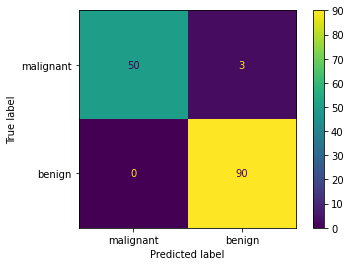

In [35]:
#plot confusion matrix ---> for sklearn version < 1.0
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(grid, X_test, y_test)
ConfusionMatrixDisplay.from_estimator(grid, X_test_scaled, y_test,
                                     display_labels=cancer.target_names)

In [38]:
pd.DataFrame(grid.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000721,0.000159,0.004471,0.000312,1,{'n_neighbors': 1},0.941860,0.941176,0.929412,0.929412,0.976471,0.943666,0.017274,21
1,0.000638,0.000062,0.004829,0.000666,3,{'n_neighbors': 3},0.988372,0.964706,0.941176,0.952941,0.976471,0.964733,0.016677,3
2,0.000593,0.000146,0.004249,0.000448,5,{'n_neighbors': 5},0.988372,0.964706,0.941176,0.952941,0.964706,0.962380,0.015653,5
3,0.000575,0.000075,0.005074,0.001205,7,{'n_neighbors': 7},0.988372,0.964706,0.941176,0.952941,0.988235,0.967086,0.018854,1
4,0.000816,0.000100,0.005530,0.000286,9,{'n_neighbors': 9},0.988372,0.964706,0.941176,0.952941,0.988235,0.967086,0.018854,1


### Compare to `LogisticRegression`

In [42]:
#classifier
lgr = LogisticRegression(max_iter=1000)

In [43]:
#parameters
param_grid = {'C': [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}

In [50]:
y_train = np.where(y_train == 0, 1, 0)
y_test = np.where(y_test == 0, 1, 0) #just to make positive mean has cancer

In [51]:
#fit the grid
lgr_grid = GridSearchCV(lgr, param_grid=param_grid, 
                       cv = 5, scoring = 'recall')
lgr_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]},
             scoring='recall')

In [52]:
#best params
lgr_grid.best_params_

{'C': 1.0}

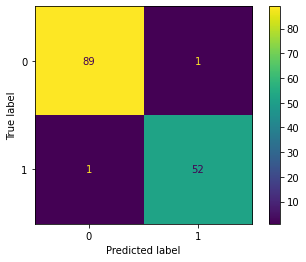

In [53]:
#confusion matrix
ConfusionMatrixDisplay.from_estimator(lgr_grid, X_test_scaled, y_test)

In [ ]:
#plot both confusion matrices side by side -- compare strengths and weaknesses
